In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('data.csv', dtype=dtypes)
a=train_df.head()
b=train_df
b

data=b.apply(lambda col: pd.factorize(col, sort=True)[0])
data

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,...,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,342,0,0,2,0,0,0,91,2,...,3,0,0,0,0,2,1,0,0,1
1,0,411,0,0,2,0,0,0,91,2,...,4,0,0,0,0,2,1,0,0,1
2,0,7,0,1,1,0,0,0,43,2,...,0,0,0,0,0,2,1771,0,0,1
3,0,13,0,1,1,0,0,0,43,1,...,0,0,77,0,0,2,1771,0,0,1
4,0,14,0,2,2,0,0,0,43,5,...,0,0,47,0,0,2,2563,0,1,1
5,0,14,0,2,2,0,0,0,43,5,...,0,0,47,0,0,2,2563,0,1,1
6,0,0,0,2,2,0,0,0,91,2,...,0,0,0,0,0,2,2837,0,0,1
7,0,9,0,2,2,0,0,1,91,2,...,0,0,76,0,0,2,2712,0,1,1
8,1,85,0,3,2,0,0,0,91,5,...,0,0,47,0,0,2,2038,0,1,0
9,1,75,0,3,2,0,0,2,91,4,...,0,0,20,0,0,2,2786,0,0,0


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
IsCanceled = data['IsCanceled']
y = IsCanceled

In [5]:
leadtime = data['LeadTime'] #1
staysweekendnights = data['StaysInWeekendNights'] #2
staysweeknights = data['StaysInWeekNights'] #3
adults = data['Adults'] #4
children = data['Children'] #5
babies = data['Babies'] #6
meal = data['Meal'] #7
country = data['Country'] #8
marketsegment = data['MarketSegment'] #9
distributionchannel = data['DistributionChannel'] #10
isrepeatedguest = data['IsRepeatedGuest'] #11
previouscancellations = data['PreviousCancellations'] #12
previousbookingsnotcanceled = data['PreviousBookingsNotCanceled'] #13
reservedroomtype = data['ReservedRoomType'] #14
assignedroomtype = data['AssignedRoomType'] #15
bookingchanges = data['BookingChanges'] #16
deptype = data['DepositType'] #17
agent = data['Agent'] #18
company = data['Company'] #19
dayswaitinglist = data['DaysInWaitingList'] #20
custype = data['CustomerType'] #21
adr = data['ADR'] #22
rcps = data['RequiredCarParkingSpaces'] #23
totalsqr = data['TotalOfSpecialRequests'] #24
reserv = data['ReservationStatus'] #25

In [6]:
x = np.column_stack((leadtime,staysweekendnights,staysweeknights,adults,children,babies,meal,country,marketsegment,distributionchannel,isrepeatedguest,previouscancellations,previousbookingsnotcanceled,reservedroomtype,assignedroomtype,bookingchanges,deptype,agent,company,dayswaitinglist,custype,adr,rcps,totalsqr,reserv))
x = sm.add_constant(x, prepend=True)
y=y.values

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00000000e+00 3.23324589e-02 5.53309181e-03 5.34558907e-03
 3.45620866e-03 4.22993414e-03 4.76504190e-04 3.25467556e-03
 4.85336690e-02 1.83455350e-02 5.56032104e-03 4.27653619e-03
 1.15577268e-02 4.93712919e-04 6.36523631e-03 7.71912536e-03
 3.85773691e-03 3.69402025e-02 1.00574940e-02 1.54331027e-03
 3.00388847e-04 1.01646250e-02 1.26896008e-02 2.78301456e-02
 6.28848643e-03 7.32847685e-01]


In [9]:
y1 = y
x1 = np.column_stack((leadtime,country,marketsegment,deptype,custype,reserv))
x1 = sm.add_constant(x1, prepend=True)

In [10]:
type(country)

pandas.core.series.Series

In [11]:
y1

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
x1

array([[  1., 342.,  91., ...,   0.,   2.,   1.],
       [  1., 411.,  91., ...,   0.,   2.,   1.],
       [  1.,   7.,  43., ...,   0.,   2.,   1.],
       ...,
       [  1., 204.,  53., ...,   0.,   2.,   1.],
       [  1., 211.,  43., ...,   0.,   0.,   1.],
       [  1., 161.,  32., ...,   0.,   2.,   1.]])

In [13]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=0)

logreg = LogisticRegression().fit(x1_train,y1_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(x1_train,y1_train)))

print("Test set score: {:.3f}".format(logreg.score(x1_test,y1_test)))

import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary())

/home/michaeljgrogan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.993
Test set score: 0.992
Optimization terminated successfully.
         Current function value: 0.100929
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                40058
Model:                          Logit   Df Residuals:                    40051
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 May 2019   Pseudo R-squ.:                  0.8291
Time:                        14:50:01   Log-Likelihood:                -4043.0
converged:                       True   LL-Null:                       -23662.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5074      0.214      7.029      0.000      

In [14]:
pr = logreg.predict(x1_test)
pr

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y1_test,pr))
print(classification_report(y1_test,pr))

[[7267    0]
 [  76 2672]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7267
           1       1.00      0.97      0.99      2748

   micro avg       0.99      0.99      0.99     10015
   macro avg       0.99      0.99      0.99     10015
weighted avg       0.99      0.99      0.99     10015



In [16]:
leadtime # sig - Higher lead time leads to more cancellations
country # sig
marketsegment # sig - Corporate clients and clients that book directly less likely to cancel
deptype # sig - Non-refundable deposit generally leads to less cancellations
custype # insig
reserv # sig

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        0
9        0
10       0
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       0
28       1
29       1
        ..
40028    1
40029    1
40030    1
40031    1
40032    1
40033    1
40034    1
40035    1
40036    1
40037    1
40038    1
40039    1
40040    1
40041    1
40042    1
40043    1
40044    1
40045    1
40046    1
40047    1
40048    1
40049    1
40050    1
40051    1
40052    1
40053    1
40054    1
40055    1
40056    1
40057    1
Name: ReservationStatus, Length: 40058, dtype: int64

In [17]:
pr = logreg.predict(x1_test)
pr

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
x1_test

array([[ 1.,  7., 32., ...,  0.,  2.,  1.],
       [ 1., 31., 38., ...,  0.,  2.,  1.],
       [ 1., 71., 15., ...,  0.,  2.,  1.],
       ...,
       [ 1.,  1., 91., ...,  0.,  3.,  1.],
       [ 1., 52., 18., ...,  0.,  2.,  1.],
       [ 1., 47., 94., ...,  0.,  3.,  1.]])

In [19]:
# leadtime, country, marketsegment, deptype, custype, reserv

#Cancellation
bx1 = np.column_stack((1.5074,42,91,5,0,2,0))
bx1 = sm.add_constant(bx1, prepend=True)
bx1
pre1 = logreg.predict(bx1)
pre1

array([1])

In [20]:
# leadtime, country, marketsegment, deptype, custype, reserv

#No cancellation
bx2 = np.column_stack((1.5074,38,91,5,0,2,1))
bx2 = sm.add_constant(bx2, prepend=True)
bx2
pre2 = logreg.predict(bx2)
pre2

array([0])

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y1_test,logreg.decision_function(x1_test))

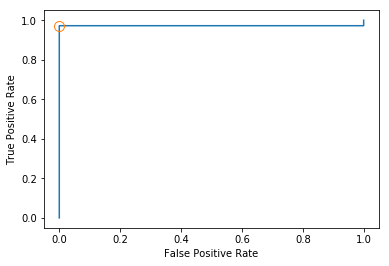

In [22]:
plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [23]:
# Odds of not cancelling

sum1=1.5074+(0.0014*38)+(0.0184*91)+(0.1697*5)+(1.1369*0)-(0.0812*2)-(7.2326*1)
odds=np.exp(sum1)
probability1=odds/(1+odds)
probability1

0.035178771854560434

In [24]:
# Odds of cancelling

sum2=1.5074+(0.0014*42)+(0.0184*91)+(0.1697*5)+(1.1369*0)-(0.0812*2)-(7.2326*0)
odds=np.exp(sum2)
probability2=odds/(1+odds)
probability2

0.9806723178783029